## Return on FAANG Stocks, Facebook, Amazon, Apple, Netflix and Google

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
tickers = ['AAPL', 'FB', 'AMZN', 'NFLX', 'GOOG']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source= 'yahoo', start = '2008-1-1')['Adj Close']

Now to gather key performannce data from 2008-2020

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3093 entries, 2008-01-02 to 2020-04-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3093 non-null   float64
 1   FB      1989 non-null   float64
 2   AMZN    3093 non-null   float64
 3   NFLX    3093 non-null   float64
 4   GOOG    3093 non-null   float64
dtypes: float64(5)
memory usage: 145.0 KB


The following charts are the stocks prices through out the years 

In [10]:
mydata.head(10)

,AAPL,FB,AMZN,NFLX,GOOG
Date,,,,,
2008-01-02,24.161295,NaN,96.250000,3.764286,341.315674
2008-01-03,24.172449,NaN,95.209999,3.724286,341.385406
2008-01-04,22.327251,NaN,88.790001,3.515714,327.273285
2008-01-07,22.028393,NaN,88.820000,3.554286,323.412781
2008-01-08,21.235991,NaN,87.879997,3.328571,314.660583
2008-01-09,22.246645,NaN,85.220001,3.285714,325.380402
2008-01-10,22.075516,NaN,84.260002,3.528571,322.157471
2008-01-11,21.414568,NaN,81.080002,3.344286,317.933319
2008-01-14,22.169762,NaN,82.870003,3.252857,325.689240


In [11]:
mydata.tail(10)

,AAPL,FB,AMZN,NFLX,GOOG
Date,,,,,
2020-04-01,240.910004,159.600006,1907.699951,364.079987,1105.619995
2020-04-02,244.929993,158.190002,1918.829956,370.079987,1120.839966
2020-04-03,241.410004,154.179993,1906.589966,361.760010,1097.880005
2020-04-06,262.470001,165.550003,1997.589966,379.959991,1186.920044
2020-04-07,259.429993,168.830002,2011.599976,372.279999,1186.510010
2020-04-08,266.070007,174.279999,2043.000000,371.119995,1210.280029
2020-04-09,267.989990,175.190002,2042.760010,370.720001,1211.449951
2020-04-13,273.250000,174.789993,2168.870117,396.720001,1217.560059
2020-04-14,287.049988,178.169998,2283.320068,413.549988,1269.229980


Now this chart shows the performance of these stocks from 2008-2020

In [12]:
mydata.iloc[0]

AAPL     24.161295
FB             NaN
AMZN     96.250000
NFLX      3.764286
GOOG    341.315674
Name: 2008-01-02 00:00:00, dtype: float64

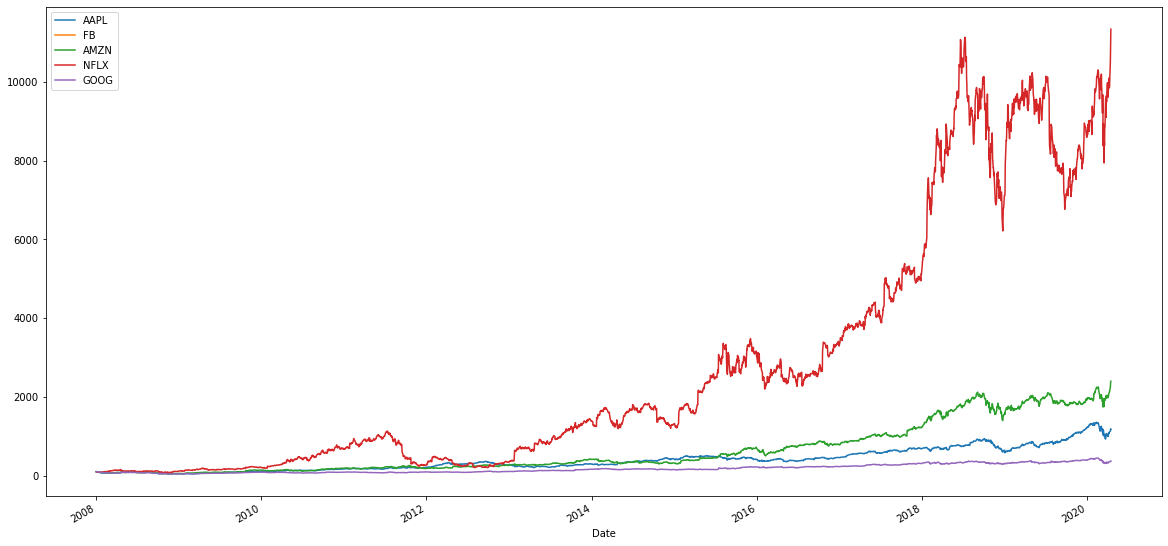

In [21]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (20, 10));
plt.show()

From this chart we can conclude that from 2008-2020 Netflix (NFLX) has been growing the fastest compared to the other FAAG stocks

Now I'm going to conduct the percent return of the FAANG stocks

In [14]:
returns = (mydata / mydata.shift(1)) - 1
returns.head(10)

,AAPL,FB,AMZN,NFLX,GOOG
Date,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN
2008-01-03,0.000462,NaN,-0.010805,-0.010626,0.000204
2008-01-04,-0.076335,NaN,-0.067430,-0.056003,-0.041338
2008-01-07,-0.013385,NaN,0.000338,0.010971,-0.011796
2008-01-08,-0.035972,NaN,-0.010583,-0.063505,-0.027062
2008-01-09,0.047592,NaN,-0.030269,-0.012875,0.034068
2008-01-10,-0.007692,NaN,-0.011265,0.073913,-0.009905
2008-01-11,-0.029940,NaN,-0.037740,-0.052227,-0.013112
2008-01-14,0.035265,NaN,0.022077,-0.027339,0.024395


In [15]:
returns = (mydata / mydata.shift(1)) - 1
returns.tail(10)

,AAPL,FB,AMZN,NFLX,GOOG
Date,,,,,
2020-04-01,-0.052617,-0.043165,-0.021552,-0.030413,-0.049183
2020-04-02,0.016687,-0.008835,0.005834,0.016480,0.013766
2020-04-03,-0.014371,-0.025349,-0.006379,-0.022482,-0.020485
2020-04-06,0.087237,0.073745,0.047729,0.050310,0.081102
2020-04-07,-0.011582,0.019813,0.007013,-0.020213,-0.000345
2020-04-08,0.025595,0.032281,0.015609,-0.003116,0.020034
2020-04-09,0.007216,0.005222,-0.000117,-0.001078,0.000967
2020-04-13,0.019628,-0.002283,0.061735,0.070134,0.005044
2020-04-14,0.050503,0.019338,0.052769,0.042423,0.042437


In [16]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

now to collect the annual returns 

In [17]:
annual_returns = returns.mean() * 250
annual_returns

AAPL    0.249834
FB      0.260688
AMZN    0.325970
NFLX    0.522515
GOOG    0.149068
dtype: float64

In [19]:
np.dot(annual_returns,weights)

0.30161493441558507

In [20]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

30.160999999999998 %


## From this data we can conclude that the FAANG stocks generate about 30% annually 